# Recurrent Neural Network
Long Short-Term Memory (LSTM)

# Part 1 data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [5]:
# reading dataset of goog price from 03Jan2007 to 10Feb2023
goog = pd.read_csv('dataset/goog.csv', parse_dates=['Date'], index_col='Date')
goog

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Up Move,Down Move,Average Up,Average Down,RS,rsi,macd
Date,,,,,,,,,,,,,,
2007-01-03,11.606496,11.872001,11.484703,11.646098,309415434,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2007-01-04,11.681216,12.053570,11.665027,12.036385,316686586,0,0.0,0.390286,0.000000,NaN,NaN,NaN,NaN,0.031134
2007-01-05,12.017456,12.141989,11.908115,12.134268,275914333,0,0.0,0.097883,0.000000,NaN,NaN,NaN,NaN,0.062980
2007-01-08,12.146721,12.201018,12.009984,12.044355,190888826,0,0.0,0.000000,0.089912,NaN,NaN,NaN,NaN,0.080041
2007-01-09,12.090930,12.160669,11.985077,12.092176,216062832,0,0.0,0.047821,0.000000,NaN,NaN,NaN,NaN,0.096310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,102.684998,104.699997,102.209999,103.470001,25573000,0,0.0,0.000000,1.750000,1.362132,0.901166,1.511522,60.183508,3.245416
2023-02-07,103.629997,108.669998,103.547996,108.040001,33738800,0,0.0,4.570000,0.000000,1.591266,0.836797,1.901615,65.536434,3.578233
2023-02-08,102.690002,103.580002,98.455002,100.000000,73546000,0,0.0,0.000000,8.040001,1.477604,1.351312,1.093459,52.232168,3.156842


In [26]:
df=goog.copy()
# slicing the close price
# 3:4 instead of 3 to be able to be in 2 dim for scaler
df=df.iloc[:, 3:4].values
df

array([[ 11.64609814],
       [ 12.03638458],
       [ 12.13426781],
       ...,
       [100.        ],
       [ 95.45999908],
       [ 94.86000061]])

In [27]:
# spliting into train set(4036) and test set(20 records)
df_train = df[:4036,]
df_train

array([[ 92.80000305],
       [ 92.16000366],
       [ 91.77999878],
       [ 93.91000366],
       [ 99.27999878],
       [101.2099991 ],
       [ 99.20999908],
       [ 96.73000336],
       [ 99.16000366],
       [100.7099991 ],
       [ 97.94999695],
       [ 99.87000275],
       [101.4300003 ],
       [108.8000031 ],
       [105.2200012 ],
       [103.4700012 ],
       [108.0400009 ],
       [100.        ],
       [ 95.45999908],
       [ 94.86000061]])

In [28]:
# min max normalisation of training set
scaler = MinMaxScaler()
train_set = scaler.fit_transform(df_train)

In [30]:
# the number of past price to considered for training
n_days = 60

In [46]:
# preparing X_train and y_train
X_train = []
y_train = []

for i in range(n_days, len(train_set)):
    X_train.append(train_set[(i - n_days):i, 0])
    y_train.append(train_set[i, 0])

X_train
# X_train currently is a list of arrays

[array([0.03627332, 0.03897806, 0.03965641, 0.0390333 , 0.03936471,
        0.04004823, 0.04181917, 0.04273053, 0.04260626, 0.04139801,
        0.03976688, 0.04009828, 0.03856036, 0.03825139, 0.04170697,
        0.03981175, 0.04114946, 0.04056777, 0.0408871 , 0.04212641,
        0.03871743, 0.03867427, 0.0361991 , 0.03694475, 0.03669103,
        0.03686708, 0.03528946, 0.03466807, 0.03480788, 0.03598679,
        0.03521696, 0.03667894, 0.03705177, 0.03770077, 0.03769904,
        0.03679632, 0.03581418, 0.03302486, 0.03314223, 0.03293165,
        0.03128325, 0.03167507, 0.03454035, 0.03421066, 0.03405187,
        0.03374807, 0.03405704, 0.03203409, 0.03289195, 0.03257953,
        0.03165781, 0.03275904, 0.03242246, 0.03436774, 0.03531535,
        0.0352791 , 0.03582626, 0.03558807, 0.03528774, 0.03512203]),
 array([0.03897806, 0.03965641, 0.0390333 , 0.03936471, 0.04004823,
        0.04181917, 0.04273053, 0.04260626, 0.04139801, 0.03976688,
        0.04009828, 0.03856036, 0.03825139, 0.

In [49]:
# converting X_train y_train from list of arrays to one array for reshape
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
X_train

(3976, 60)


array([[0.03627332, 0.03897806, 0.03965641, ..., 0.03558807, 0.03528774,
        0.03512203],
       [0.03897806, 0.03965641, 0.0390333 , ..., 0.03528774, 0.03512203,
        0.03464563],
       [0.03965641, 0.0390333 , 0.03936471, ..., 0.03512203, 0.03464563,
        0.03470949],
       ...,
       [0.64656931, 0.62903604, 0.65398457, ..., 0.55689316, 0.56652611,
        0.57096141],
       [0.62903604, 0.65398457, 0.65821196, ..., 0.56652611, 0.57096141,
        0.57401064],
       [0.65398457, 0.65821196, 0.65058881, ..., 0.57096141, 0.57401064,
        0.59493972]])

In [62]:
# Reshaping X_train from 2 dim (3976, 60) to 3 dim (3976, 60, 1) for training
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
X_train

(3976, 60, 1)


array([[[0.03627332],
        [0.03897806],
        [0.03965641],
        ...,
        [0.03558807],
        [0.03528774],
        [0.03512203]],

       [[0.03897806],
        [0.03965641],
        [0.0390333 ],
        ...,
        [0.03528774],
        [0.03512203],
        [0.03464563]],

       [[0.03965641],
        [0.0390333 ],
        [0.03936471],
        ...,
        [0.03512203],
        [0.03464563],
        [0.03470949]],

       ...,

       [[0.64656931],
        [0.62903604],
        [0.65398457],
        ...,
        [0.55689316],
        [0.56652611],
        [0.57096141]],

       [[0.62903604],
        [0.65398457],
        [0.65821196],
        ...,
        [0.56652611],
        [0.57096141],
        [0.57401064]],

       [[0.65398457],
        [0.65821196],
        [0.65058881],
        ...,
        [0.57096141],
        [0.57401064],
        [0.59493972]]])

# Part 2 - Building and Training RNN

In [63]:
# initialising rnn 
lstm = tf.keras.models.Sequential()

In [64]:
# first layer of lstm with dropout of 20% for generalising
lstm.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(tf.keras.layers.Dropout(rate=0.2))


In [65]:
# second layer of lstm
lstm.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
lstm.add(tf.keras.layers.Dropout(rate=0.2))

In [66]:
# third layer of lstm
lstm.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
lstm.add(tf.keras.layers.Dropout(rate=0.2))

In [67]:
# last layer of lstm, no further need to return sequences
lstm.add(tf.keras.layers.LSTM(units=50))
lstm.add(tf.keras.layers.Dropout(rate=0.2))

In [68]:
# output layer
lstm.add(tf.keras.layers.Dense(units=1))

In [71]:
# compile the rnn
lstm.compile(optimizer='adam', loss='mean_squared_error')

In [72]:
# training the model
lstm.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
125/125 [==============================] - 20s 79ms/step - loss: 0.0065
Epoch 2/100
125/125 [==============================] - 10s 78ms/step - loss: 0.0021
Epoch 3/100
125/125 [==============================] - 10s 83ms/step - loss: 0.0018
Epoch 4/100
125/125 [==============================] - 10s 77ms/step - loss: 0.0017
Epoch 5/100
125/125 [==============================] - 9s 72ms/step - loss: 0.0014
Epoch 6/100
125/125 [==============================] - 9s 72ms/step - loss: 0.0014
Epoch 7/100
125/125 [==============================] - 9s 73ms/step - loss: 0.0015
Epoch 8/100
125/125 [==============================] - 9s 72ms/step - loss: 0.0011
Epoch 9/100
125/125 [==============================] - 9s 71ms/step - loss: 0.0013
Epoch 10/100
125/125 [==============================] - 9s 72ms/step - loss: 0.0010
Epoch 11/100
125/125 [==============================] - 9s 72ms/step - loss: 0.0011
Epoch 12/100
125/125 [==============================] - 9s 72ms/step - loss: 0.00

# Part 3 - Evaluting LSTM

In [105]:
# slicing test set from df
test_set=df[len(df)-n_days-20:]
print(test_set.shape)
print(test_set[0:2])

# reshaping test set for scaling
test_set = test_set.reshape(-1, 1)
print(test_set.shape)
print(test_set[0:2])

# scaling of test set using fitted scaler
test_set = scaler.transform(test_set)
print(test_set[0:2])

(80, 1)
[[101.3899994]
 [100.2900009]]
(80, 1)
[[101.3899994]
 [100.2900009]]
[[0.65821196]
 [0.65058881]]


In [106]:
# preparing train set for prediction to (20, 60, 1)
X_test = []
y_test = []

for i in range(n_days, len(test_set)):
    X_test.append(test_set[(i-n_days): i])
    y_test.append(test_set[i])    

X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test[0:2]

(20, 60, 1)


array([[[0.65821196],
        [0.65058881],
        [0.65225203],
        [0.6588357 ],
        [0.66916161],
        [0.6827447 ],
        [0.61268088],
        [0.59729594],
        [0.62487796],
        [0.61157209],
        [0.58274264],
        [0.55897222],
        [0.53416228],
        [0.55640805],
        [0.56992187],
        [0.57172373],
        [0.56125919],
        [0.60817627],
        [0.62591749],
        [0.62106636],
        [0.63970847],
        [0.64157959],
        [0.63818383],
        [0.63333275],
        [0.61968035],
        [0.63007557],
        [0.64040148],
        [0.63194669],
        [0.622591  ],
        [0.61697759],
        [0.65862775],
        [0.65744964],
        [0.65433109],
        [0.64767816],
        [0.62993694],
        [0.61496784],
        [0.60665163],
        [0.60055312],
        [0.60394888],
        [0.61981893],
        [0.61607664],
        [0.58759372],
        [0.5852375 ],
        [0.57338695],
        [0.57671339],
        [0

In [113]:
y_pred = lstm.predict(X_test)
print(y_pred[0])
y_test, y_pred = scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred)
print(y_test[0], y_pred[0])

1/1 [==============================] - 0s 43ms/step
[0.58370095]
[92.80000305] [90.63828]


In [114]:
import math
from sklearn.metrics import mean_squared_error


In [115]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

In [116]:
print(rmse)

4.314804773649832


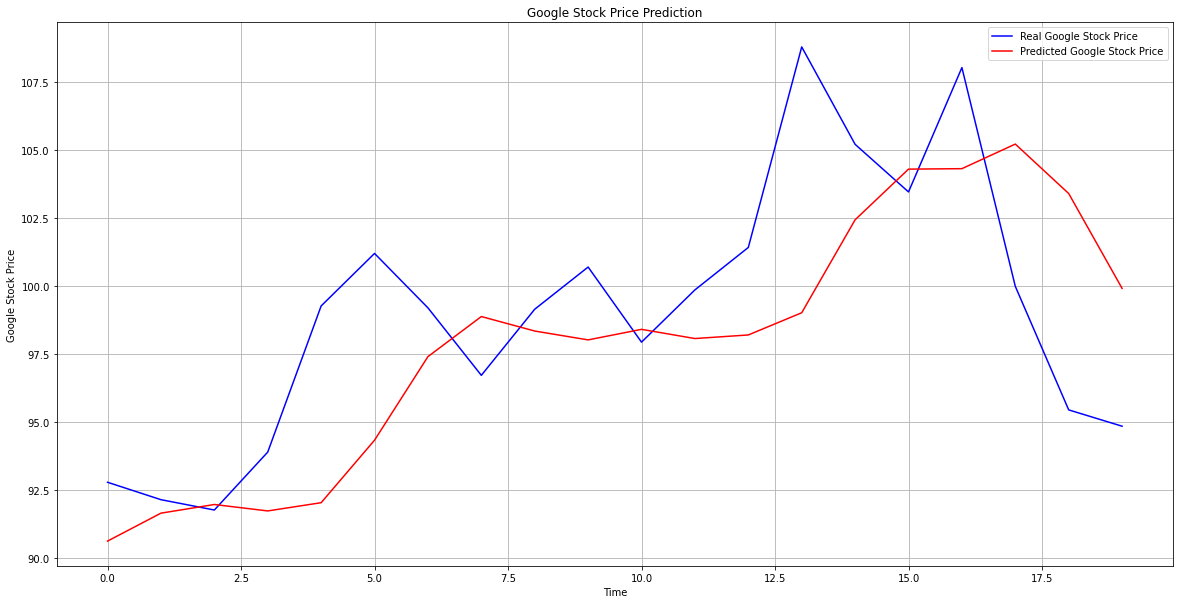

In [122]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, color = 'blue', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.grid()
plt.legend()
plt.show()

In [118]:
y_pred

array([[ 90.63828 ],
       [ 91.66494 ],
       [ 91.982544],
       [ 91.7469  ],
       [ 92.04922 ],
       [ 94.34603 ],
       [ 97.41737 ],
       [ 98.89063 ],
       [ 98.35833 ],
       [ 98.03249 ],
       [ 98.41988 ],
       [ 98.08217 ],
       [ 98.21385 ],
       [ 99.03039 ],
       [102.44629 ],
       [104.308174],
       [104.32533 ],
       [105.22919 ],
       [103.41145 ],
       [ 99.924576]], dtype=float32)